# Plot result from "A multiscale model of melanoma pulmonary micrometastasis and immune surveillance: towards cancer patient digital twins"

In [1]:
import ipywidgets as widgets
from Plot_Population import *
from Plot_Patients import *

#### Downloading and Loading dataset 

In [2]:
df_input, df_output = Loading_dataset()

## 1. Cell population of virtual patients

Cell population in lymph node and in the microenvironment for 10k samples (patients), mean and standard deviation for 10 replicates. 

In [3]:
widgets.interact(plot_PopCells,df_output=widgets.fixed(df_output), sampleID=widgets.BoundedIntText(min=0, max=9999, step=1, value=6, description='Patient: '), FigName=widgets.fixed(None))

interactive(children=(BoundedIntText(value=2, description='Patient: ', max=9999), Output()), _dom_classes=('wi…

<function Plot_Population.plot_PopCells(df_output, sampleID, FigName=None)>

#### Cell population of Patients: 2, 93, and 5

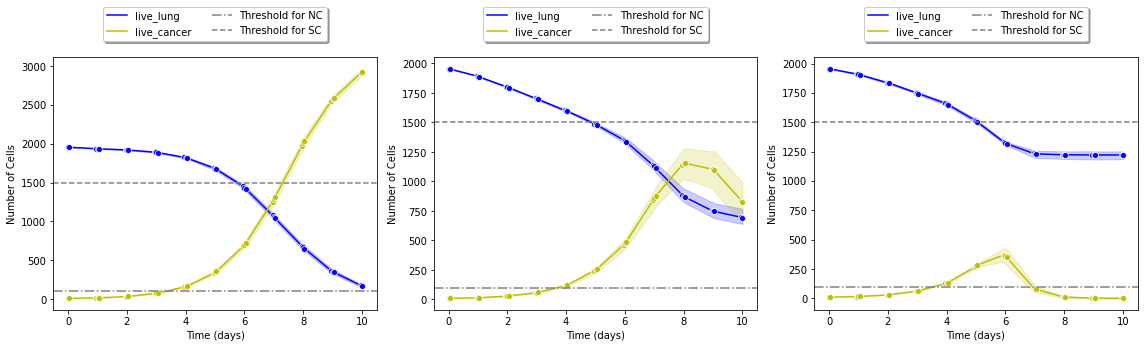

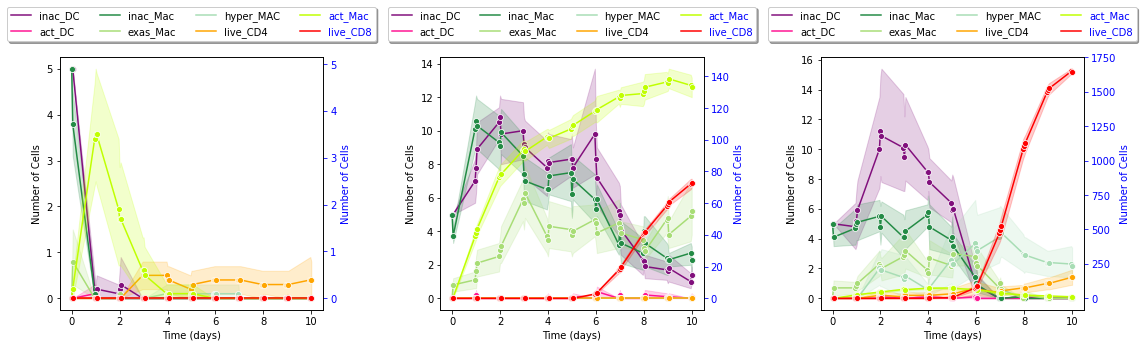

In [4]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16, 5))
fig2, (ax11,ax12,ax13) = plt.subplots(1,3,figsize=(16, 5))
plotSamplesMicroEnv(df_output, 2,ax1,ax11)
plotSamplesMicroEnv(df_output, 93,ax2,ax12)
plotSamplesMicroEnv(df_output,5,ax3,ax13)
# set the spacing between subplots
fig.tight_layout()
fig2.tight_layout()
plt.show()

## 2. Labeling patients
### 2.1 Labeling based on threshold

* Labeling based on cancer cell population at day 10 (last time) for all 100k simulations. The thresholds chosen in the last point were 100 and 1500 cells, defining the Significant Control (SC), Marginal Control (MC), and No Control (NC).
* Grouping the simulations in 10,000 patients and labeling them into 7 different classes {NC,MC,SC,NC+MC,NC+SC,MC+SC,NC+MC+SC}
* Regrouping patients into 3 classes, considering the mixed class as the union of {NC+MC,NC+SC,MC+SC,NC+MC+SC}.

In [5]:
Sim_df_lastFrame = Classifier_Simulations(df_output)
Pat_df_7classes, Pat_df_3classes = Classifier_Patients(Sim_df_lastFrame)

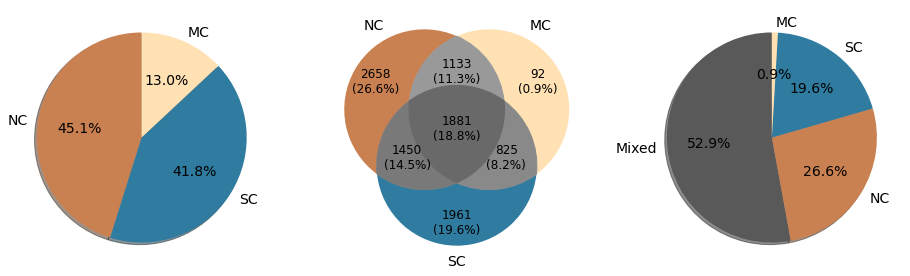

In [6]:
Plot_Patients(Sim_df_lastFrame,Pat_df_7classes,Pat_df_3classes, Title=False)

#### 2.1.1 Parameters space according the labels

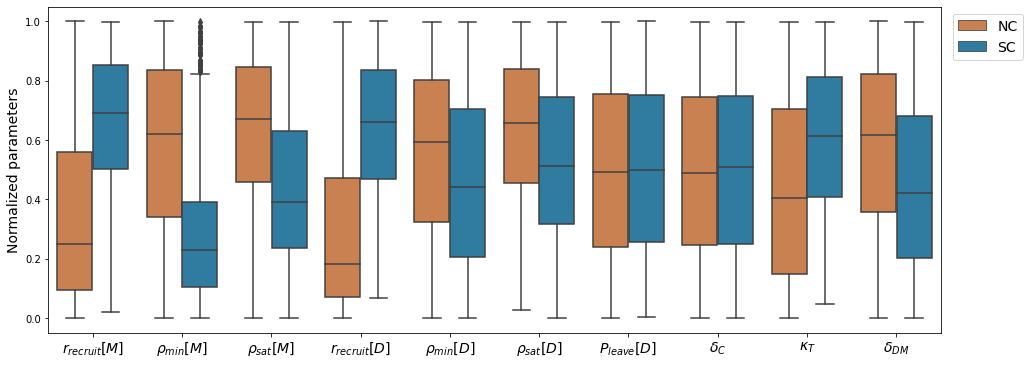

In [7]:
df_input_min_max_scaled = Normalize_Parameters(df_input, Pat_df_3classes)
Plot_Parameters(df_input_min_max_scaled)

Perform T-test

In [8]:
T_test(df_input_min_max_scaled)

,macrophage_max_recruitment_rate,macrophage_recruitment_min_signal,macrophage_recruitment_saturation_signal,DC_max_recruitment_rate,DC_recruitment_min_signal,DC_recruitment_saturation_signal,DC_leave_prob,TC_death_rate,T_Cell_Recruitment,DM_decay
t-stat,-4.014013e+01,3.947799e+01,2.809268e+01,-45.8827,1.162551e+01,1.543151e+01,-0.579423,-0.545542,-2.001633e+01,1.588502e+01
p-value,1.766140e-302,5.952549e-294,1.908225e-160,0.0000,8.183805e-31,2.006148e-52,0.562332,0.585407,1.536341e-85,2.302039e-55


#### 2.1.2 Patients Variation

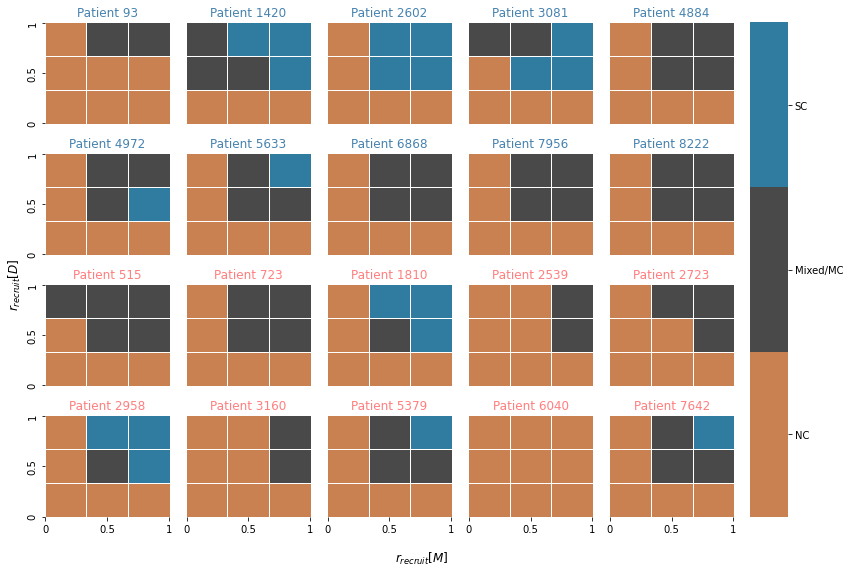

In [9]:
Plot_PatientAnalysis()

### 2.2 Labeling based on image trajectories

Applying dimensionality reduction in image frames trajectories (concatenated images over time, matrix shape =$(100k, 2325)$, 31 RGB images $5\times 5$ overtime) using Uniform Manifold Approximation and Projection (UMAP).

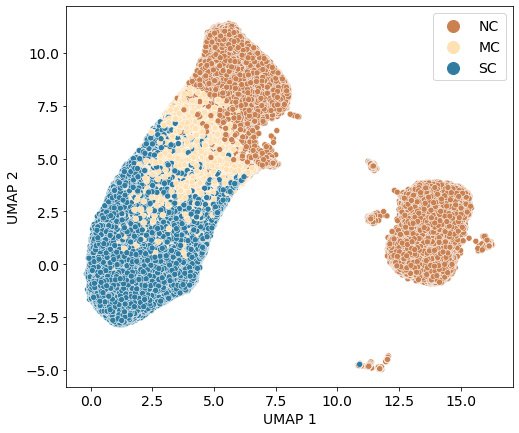

In [10]:
Plot_UMAP(Sim_df_lastFrame)

Plotting the average of trajectories replicates (matrix shape = (10k, 2325))

In [ ]:
Plot_UMAP(Sim_df_lastFrame)